In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
from utils import *
from plot_utils import *
%matplotlib inline

In [2]:
n_values = np.arange(5, 100, 1, dtype=int)

values_dict = {
    'star': dict(),
    'wheel': dict(),
    'comb': dict(),  
    'agave step=1': dict(),
    'agave step=n/3': dict(),
    'agave step=n': dict(),
    'complete_bipartite a=b': dict(),
    'complete_bipartite a=b/3': dict(),
    'complete': dict()
}

excluded_metrics = ['frac', 'm3', 'm4', 'W1', 'W2']


for n in tqdm(n_values):
    
    # Star graph (n nodes: center + n-1 leaves)
    G = nx.star_graph(n - 1)
    P = stochastic_matrix_calculator(G)
    append_values_plot_1(G, P, 'star', values_dict, excluded_metrics)
    
    # Wheel graph (n nodes)
    G = nx.wheel_graph(n)
    P = stochastic_matrix_calculator(G)
    append_values_plot_1(G, P, 'wheel', values_dict, excluded_metrics)
    
    # Line graph of wheel (only if small enough)
    G_prime = nx.wheel_graph(n)
    G = nx.line_graph(G_prime)
    if G.number_of_nodes() < 200:
        append_values_plot_1(G, P, 'line_wheel', values_dict, excluded_metrics)
    
    # Complete bipartite: a = b (as balanced as possible)
    a = math.floor(n / 2)
    b = math.ceil(n / 2)
    G = nx.complete_bipartite_graph(n1=a, n2=b)
    P = stochastic_matrix_calculator(G)
    append_values_plot_1(G, P, 'complete_bipartite a=b', values_dict, excluded_metrics)
    
    # Complete bipartite: a = b/3  → so a : b ≈ 1 : 3
    a = math.floor(n / 4)
    b = n - a
    # Ensure both partitions are non-empty
    if a >= 1 and b >= 1:
        G = nx.complete_bipartite_graph(n1=a, n2=b)
        P = stochastic_matrix_calculator(G)
        append_values_plot_1(G, P, 'complete_bipartite a=b/3', values_dict, excluded_metrics)
    
    # Agave graphs
    # Step = 1
    G = create_agave_graph(n=n, steps=1)
    P = stochastic_matrix_calculator(G)
    append_values_plot_1(G, P, 'agave step=1', values_dict, excluded_metrics)
    
    # Step = n/3
    steps = max(1, math.floor(n / 3))
    G = create_agave_graph(n=n, steps=steps)
    P = stochastic_matrix_calculator(G)
    append_values_plot_1(G, P, 'agave step=n/3', values_dict, excluded_metrics)
    
    # Step = n
    steps = n
    G = create_agave_graph(n=n, steps=steps)
    P = stochastic_matrix_calculator(G)
    append_values_plot_1(G, P, 'agave step=n', values_dict, excluded_metrics)
    
    # Complete graph
    G = nx.complete_graph(n)
    P = stochastic_matrix_calculator(G)
    append_values_plot_1(G, P, 'complete', values_dict, excluded_metrics)
    
    # Comb graph (≈ n nodes total)
    G = create_comb_graph(n)
    if G.number_of_nodes() >= 2:  # ensure it's a valid non-trivial graph
        P = stochastic_matrix_calculator(G)
        append_values_plot_1(G, P, 'comb', values_dict, excluded_metrics)

  0%|          | 0/95 [00:00<?, ?it/s]d:\Personal\University\Paper\Network - Dr.Safaei\new_h_parameter\utils.py:770: RuntimeWarning: divide by zero encountered in scalar divide
  W1 = (eig_lap[-1] - eig_lap[0]) / (eig_lap[-1] - eig_lap[1])
100%|██████████| 95/95 [01:34<00:00,  1.00it/s]


In [3]:
values_df = pd.DataFrame(values_dict).T.reset_index(drop=False)
values_df.rename(columns={'index':'Graph_name'})

,Graph_name,H,m2,Q,R,sum_R_v,Estrada,Estrada_P,Energy,n
0,star,"[0.17600000000000005, 0.21599999999999997, 0.2...","[0.39999999999999997, 0.3333333333333333, 0.28...","[5.0, 6.000000000000003, 7.000000000000004, 8....","[4.0, 5.0, 6.0, 7.0, 8.0, 9.000000000000002, 1...","[0.25, 0.2, 0.16666666666666666, 0.14285714285...","[10.524391382167263, 13.46334694226153, 16.668...","[1.0861612696304876, 1.0861612696304876, 1.086...","[3.9999999999999996, 4.47213595499958, 4.89897...","[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17..."
1,wheel,"[0.007000000000000006, 0.02100000000000002, 0....","[0.31111111111111117, 0.29629629629629634, 0.2...","[1.6666666666666667, 2.518927630227216, 3.5000...","[1.3333333333333328, 1.727272727272727, 2.1500...","[0.10185185185185185, 0.13333333333333333, 0.1...","[27.85937931278961, 35.82614333907259, 44.8120...","[0.9482302580654266, 1.058607937858458, 1.1725...","[6.472135954999578, 9.371115440565934, 11.2915...","[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17..."
2,comb,"[0.05800000000000005, 0.09299999999999997, 0.0...","[0.6249999999999982, 0.5555555555555544, 0.555...","[5.828427124746188, 11.26481286554736, 11.2648...","[3.3333333333333344, 6.199999999999994, 6.1999...","[0.6666666666666666, 0.6666666666666667, 0.666...","[7.635733837560587, 12.407305943380186, 12.407...","[1.3414132000432446, 1.7763393225820039, 1.776...","[4.472135954999577, 6.898979485566352, 6.89897...","[4, 6, 6, 8, 8, 10, 10, 12, 12, 14, 14, 16, 16..."
3,agave step=1,"[0.05800000000000005, 0.09599999999999997, 0.1...","[0.3249999999999999, 0.27999999999999975, 0.24...","[2.5, 3.0000000000000004, 3.500000000000001, 4...","[1.7499999999999993, 2.2, 2.666666666666666, 3...","[0.125, 0.12000000000000002, 0.111111111111111...","[22.58875164759573, 32.606087455207316, 44.945...","[0.9694491642714644, 0.9863415456542477, 0.999...","[5.999999999999999, 6.744562646538027, 7.40312...","[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17..."
4,agave step=n/3,"[0.05800000000000005, 0.03200000000000003, 0.0...","[0.3249999999999999, 0.24, 0.2142857142857141,...","[2.5, 2.0000000000000018, 2.333333333333333, 2...","[1.7499999999999993, 1.3999999999999995, 1.666...","[0.125, 0.06, 0.06666666666666667, 0.068027210...","[22.58875164759573, 67.06844370506346, 103.847...","[0.9694491642714644, 0.9045549707090355, 0.924...","[5.999999999999999, 8.324555320336758, 9.21110...","[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17..."
5,agave step=n,"[0.0, 0.0010000000000000009, 0.001000000000000...","[0.25, 0.2000000000000001, 0.1666666666666667,...","[1.0, 1.0000000000000009, 1.0000000000000016, ...","[1.0, 1.0, 1.0000000000000007, 1.0, 0.99999999...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[56.06966779783001, 150.25255630843336, 405.63...","[0.8334849607446643, 0.8119355938489552, 0.797...","[8.0, 10.0, 12.000000000000002, 13.99999999999...","[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17..."
6,complete_bipartite a=b,"[0.020000000000000018, 0.0, 0.0110000000000000...","[0.40000000000000024, 0.3333333333333332, 0.28...","[2.500000000000002, 2.0000000000000004, 2.3333...","[1.9166666666666665, 1.8, 1.9166666666666672, ...","[0.25, 0.19999999999999998, 0.1666666666666666...","[14.668772819667716, 24.135323991555545, 36.97...","[1.0861612696304885, 1.086161269630487, 1.0861...","[4.898979485566356, 6.0000000000000036, 6.9282...","[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17..."
7,complete_bipartite a=b/3,"[0.17600000000000005, 0.21599999999999997, 0.2...","[0.39999999999999997, 0.3333333333333333, 0.28...","[5.0, 6.000000000000003, 7.000000000000004, 4....","[4.0, 5.0, 6.0, 3.19047619047619, 3.6607142857...","[0.25, 0.2, 0.16666666666666666, 0.14285714285...","[10.524391382167263, 13.46334694226153, 16.668...","[1.0861612696304876, 1.0861612696304876, 1.086...","[3.9999999999999996, 4.47213595499958, 4.89897...","[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17..."
8,complete,"[0.0, 0.0010000000000000009, 0.001000000000000...","[0.25, 0.200000

In [6]:
values_df.to_csv("SavedNetworks/artificial_networks.csv")

In [4]:
values_df = pd.read_csv("SavedNetworks/artificial_networks.csv")

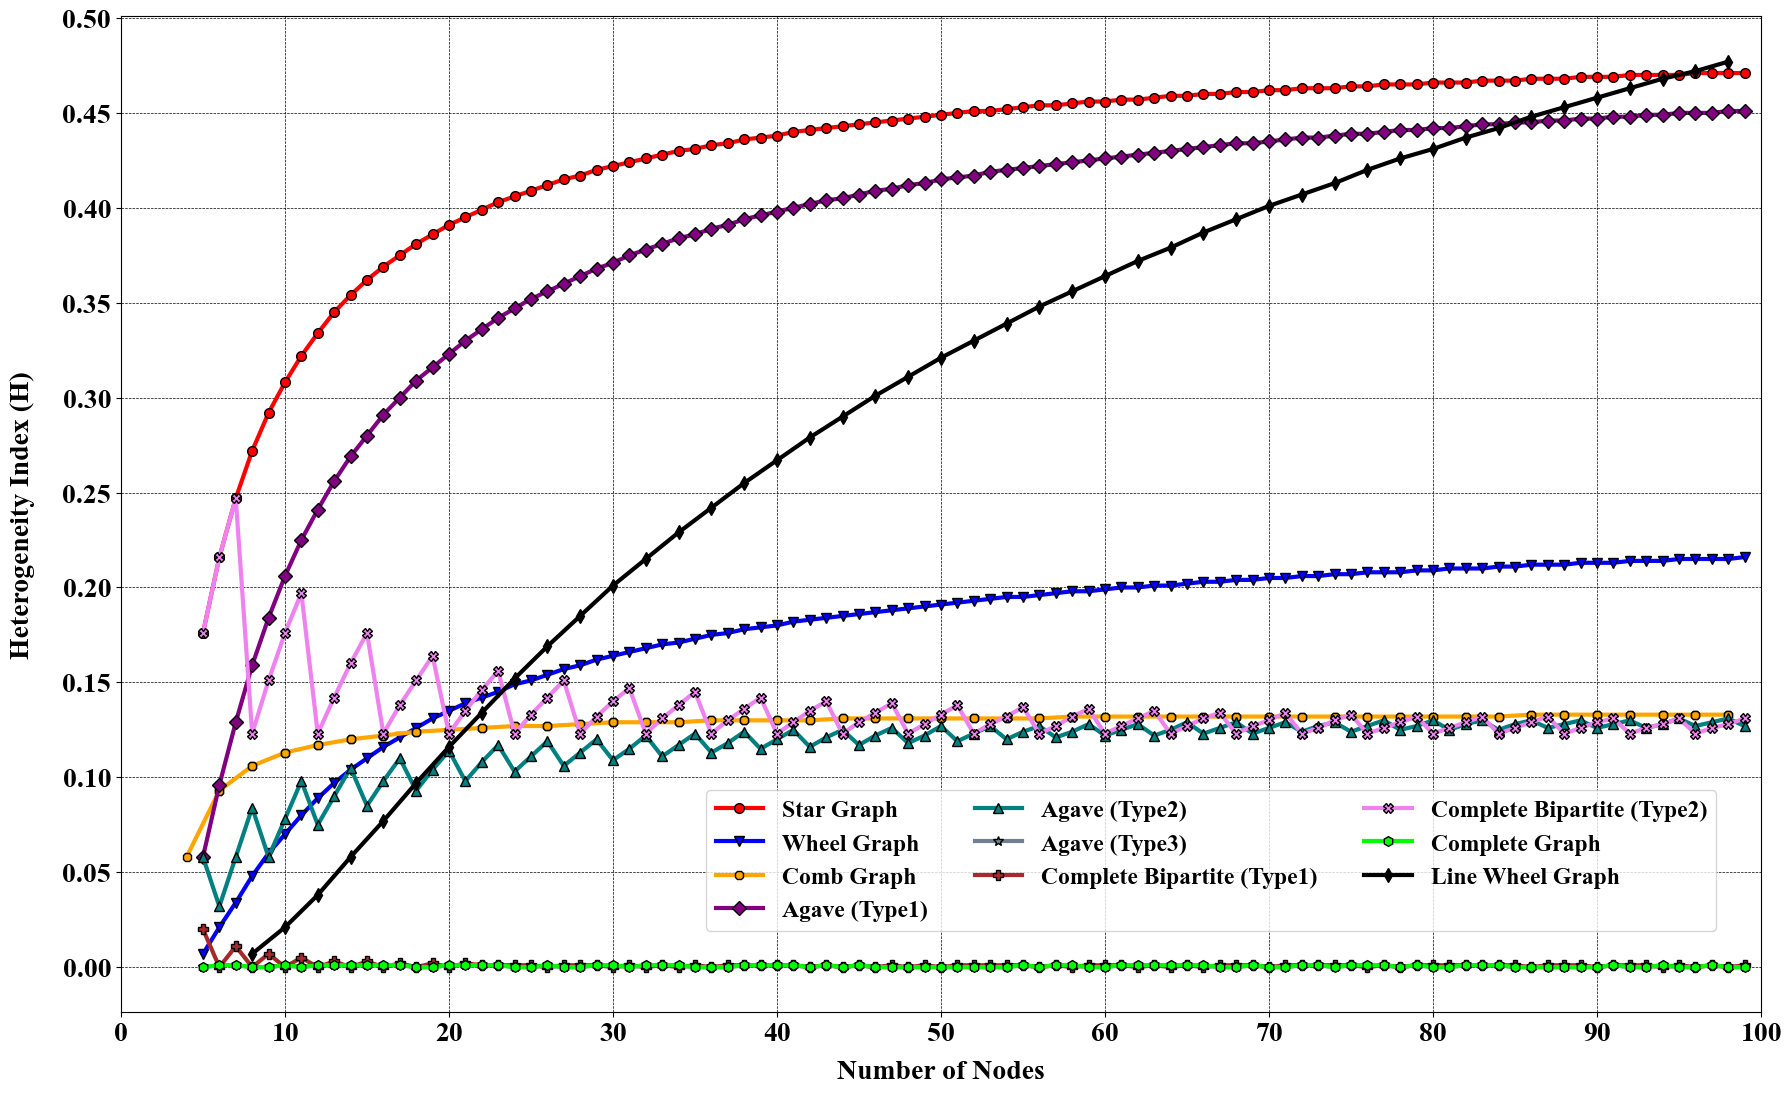

In [5]:
graph_keys = list(values_dict.keys())
exclude_keys = []

colors = ['red', 'blue', 'orange', 'purple', 'teal', 'slategrey', 'brown', 'violet', 'lime', 'black']

markers = ['o', 'v', '8', 'D', '^', '*', 'P', 'X', 'h', 'd']
marker_size = 7


legend_names = {
    'comb': 'Comb Graph',
    'star': 'Star Graph',
    'wheel': 'Wheel Graph',
    'complete_bipartite a=b': 'Complete Bipartite (Type1)',
    'complete_bipartite a=b/3': 'Complete Bipartite (Type2)',
    'complete': 'Complete Graph',
    'line_wheel': 'Line Wheel Graph',
    'agave step=1': 'Agave (Type1)',
    'agave step=n/3': 'Agave (Type2)',
    'agave step=n': 'Agave (Type3)'
}

plt.figure(figsize=(20, 12))
font = {'family': 'times new roman', 'weight': 'bold', 'size': 17}

for i, key in enumerate(graph_keys):
    if key in exclude_keys:
        continue
        

    if key == 'line_wheel':
        n_vals_all = np.array(values_dict[key]['n'])
        H_vals_all = np.array(values_dict[key]['H'])
        mask = n_vals_all < 100
        n_values = n_vals_all[mask]
        H_values = H_vals_all[mask]
    else:
        n_values = values_dict[key]['n']
        H_values = values_dict[key]['H']
    

    label = legend_names.get(key, key.replace('_', ' ').title() + " Graph")
    
    plt.plot(
        n_values,
        H_values, 
        marker=markers[i % len(markers)], 
        c=colors[i % len(colors)], 
        markeredgecolor='black',
        markerfacecolor=colors[i % len(colors)],
        markersize=marker_size,
        label=label,
        linewidth=3
        
    )

plt.xlabel('Number of Nodes', family='times new roman', weight='bold', size=20)
plt.ylabel('Heterogeneity Index (H)', family='times new roman', weight='bold', size=20)

plt.legend(
    prop=font,
    ncol=3,                     
    bbox_to_anchor=(0.98, 0.07), 
    loc='lower right',       
    frameon=True,
    fancybox=True,
    shadow=False
)


plt.ylabel('Heterogeneity Index (H)', 
           family='times new roman', 
           weight='bold', 
           size=20,
           labelpad=20) 

plt.xlabel('Number of Nodes', 
           family='times new roman', 
           weight='bold', 
           size=20,
           labelpad=10)


plt.subplots_adjust(left=0.13, bottom=0.12, right=0.95, top=0.95)


plt.xticks(np.arange(0, 101, 10), family='times new roman', weight='bold', size=20)
plt.xlim(0, 100)
plt.yticks(np.arange(0, 0.51, 0.05),family='times new roman', weight='bold', size=20)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.savefig("Figures/artificial_networks_heterogeneity_index.png", dpi=1000)
plt.show()

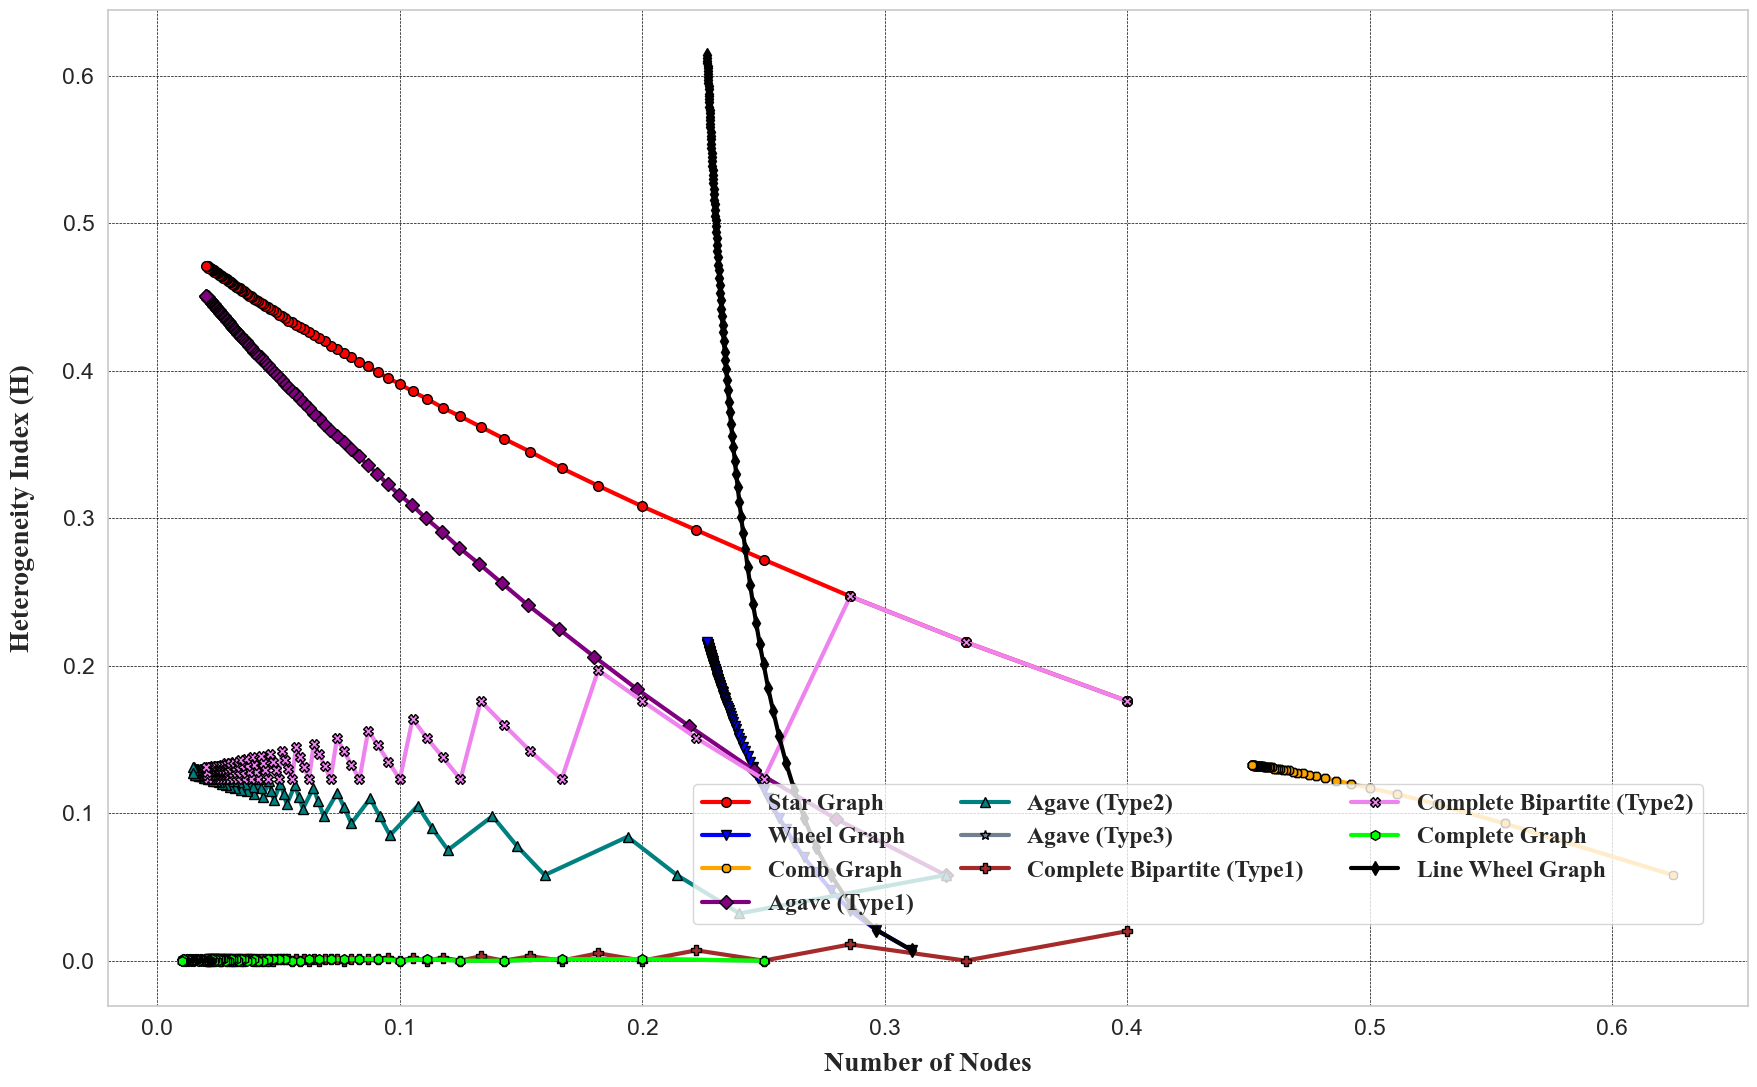

In [71]:
graph_keys = list(values_dict.keys())
exclude_keys = []

colors = ['red', 'blue', 'orange', 'purple', 'teal', 'slategrey', 'brown', 'violet', 'lime', 'black']

markers = ['o', 'v', '8', 'D', '^', '*', 'P', 'X', 'h', 'd']
marker_size = 7


legend_names = {
    'comb': 'Comb Graph',
    'star': 'Star Graph',
    'wheel': 'Wheel Graph',
    'complete_bipartite a=b': 'Complete Bipartite (Type1)',
    'complete_bipartite a=b/3': 'Complete Bipartite (Type2)',
    'complete': 'Complete Graph',
    'line_wheel': 'Line Wheel Graph',
    'agave step=1': 'Agave (Type1)',
    'agave step=n/3': 'Agave (Type2)',
    'agave step=n': 'Agave (Type3)'
}

plt.figure(figsize=(20, 12))
font = {'family': 'times new roman', 'weight': 'bold', 'size': 17}

for i, key in enumerate(graph_keys):
    if key in exclude_keys:
        continue
        

    if key == 'line_wheel':
        m2_vals_all = np.array(values_dict[key]['m2'])
        H_vals_all = np.array(values_dict[key]['H'])
        mask = m2_vals_all < 100
        m2_values = m2_vals_all[mask]
        H_values = H_vals_all[mask]
    else:
        m2_values = values_dict[key]['m2']
        H_values = values_dict[key]['H']
    

    label = legend_names.get(key, key.replace('_', ' ').title() + " Graph")
    
    plt.plot(
        m2_values,
        H_values, 
        marker=markers[i % len(markers)], 
        c=colors[i % len(colors)], 
        markeredgecolor='black',
        markerfacecolor=colors[i % len(colors)],
        markersize=marker_size,
        label=label,
        linewidth=3
        
    )

plt.xlabel('m2', family='times new roman', weight='bold', size=20)
plt.ylabel('Heterogeneity Index (H)', family='times new roman', weight='bold', size=20)

plt.legend(
    prop=font,
    ncol=3,                     
    bbox_to_anchor=(0.98, 0.07), 
    loc='lower right',       
    frameon=True,
    fancybox=True,
    shadow=False
)


plt.ylabel('Heterogeneity Index (H)', 
           family='times new roman', 
           weight='bold', 
           size=20,
           labelpad=20) 

plt.xlabel('Number of Nodes', 
           family='times new roman', 
           weight='bold', 
           size=20,
           labelpad=10)


plt.subplots_adjust(left=0.13, bottom=0.12, right=0.95, top=0.95)


# plt.xticks(np.arange(0, 101, 10), family='times new roman', weight='bold', size=20)
# plt.xlim(0, 100)
# plt.yticks(np.arange(0, 0.51, 0.05),family='times new roman', weight='bold', size=20)
plt.grid(color='black', linestyle='--', linewidth=0.5)
# plt.savefig("Figures/artificial_networks_heterogeneity_index.png", dpi=1000, bbox_inches='tight')
plt.show()

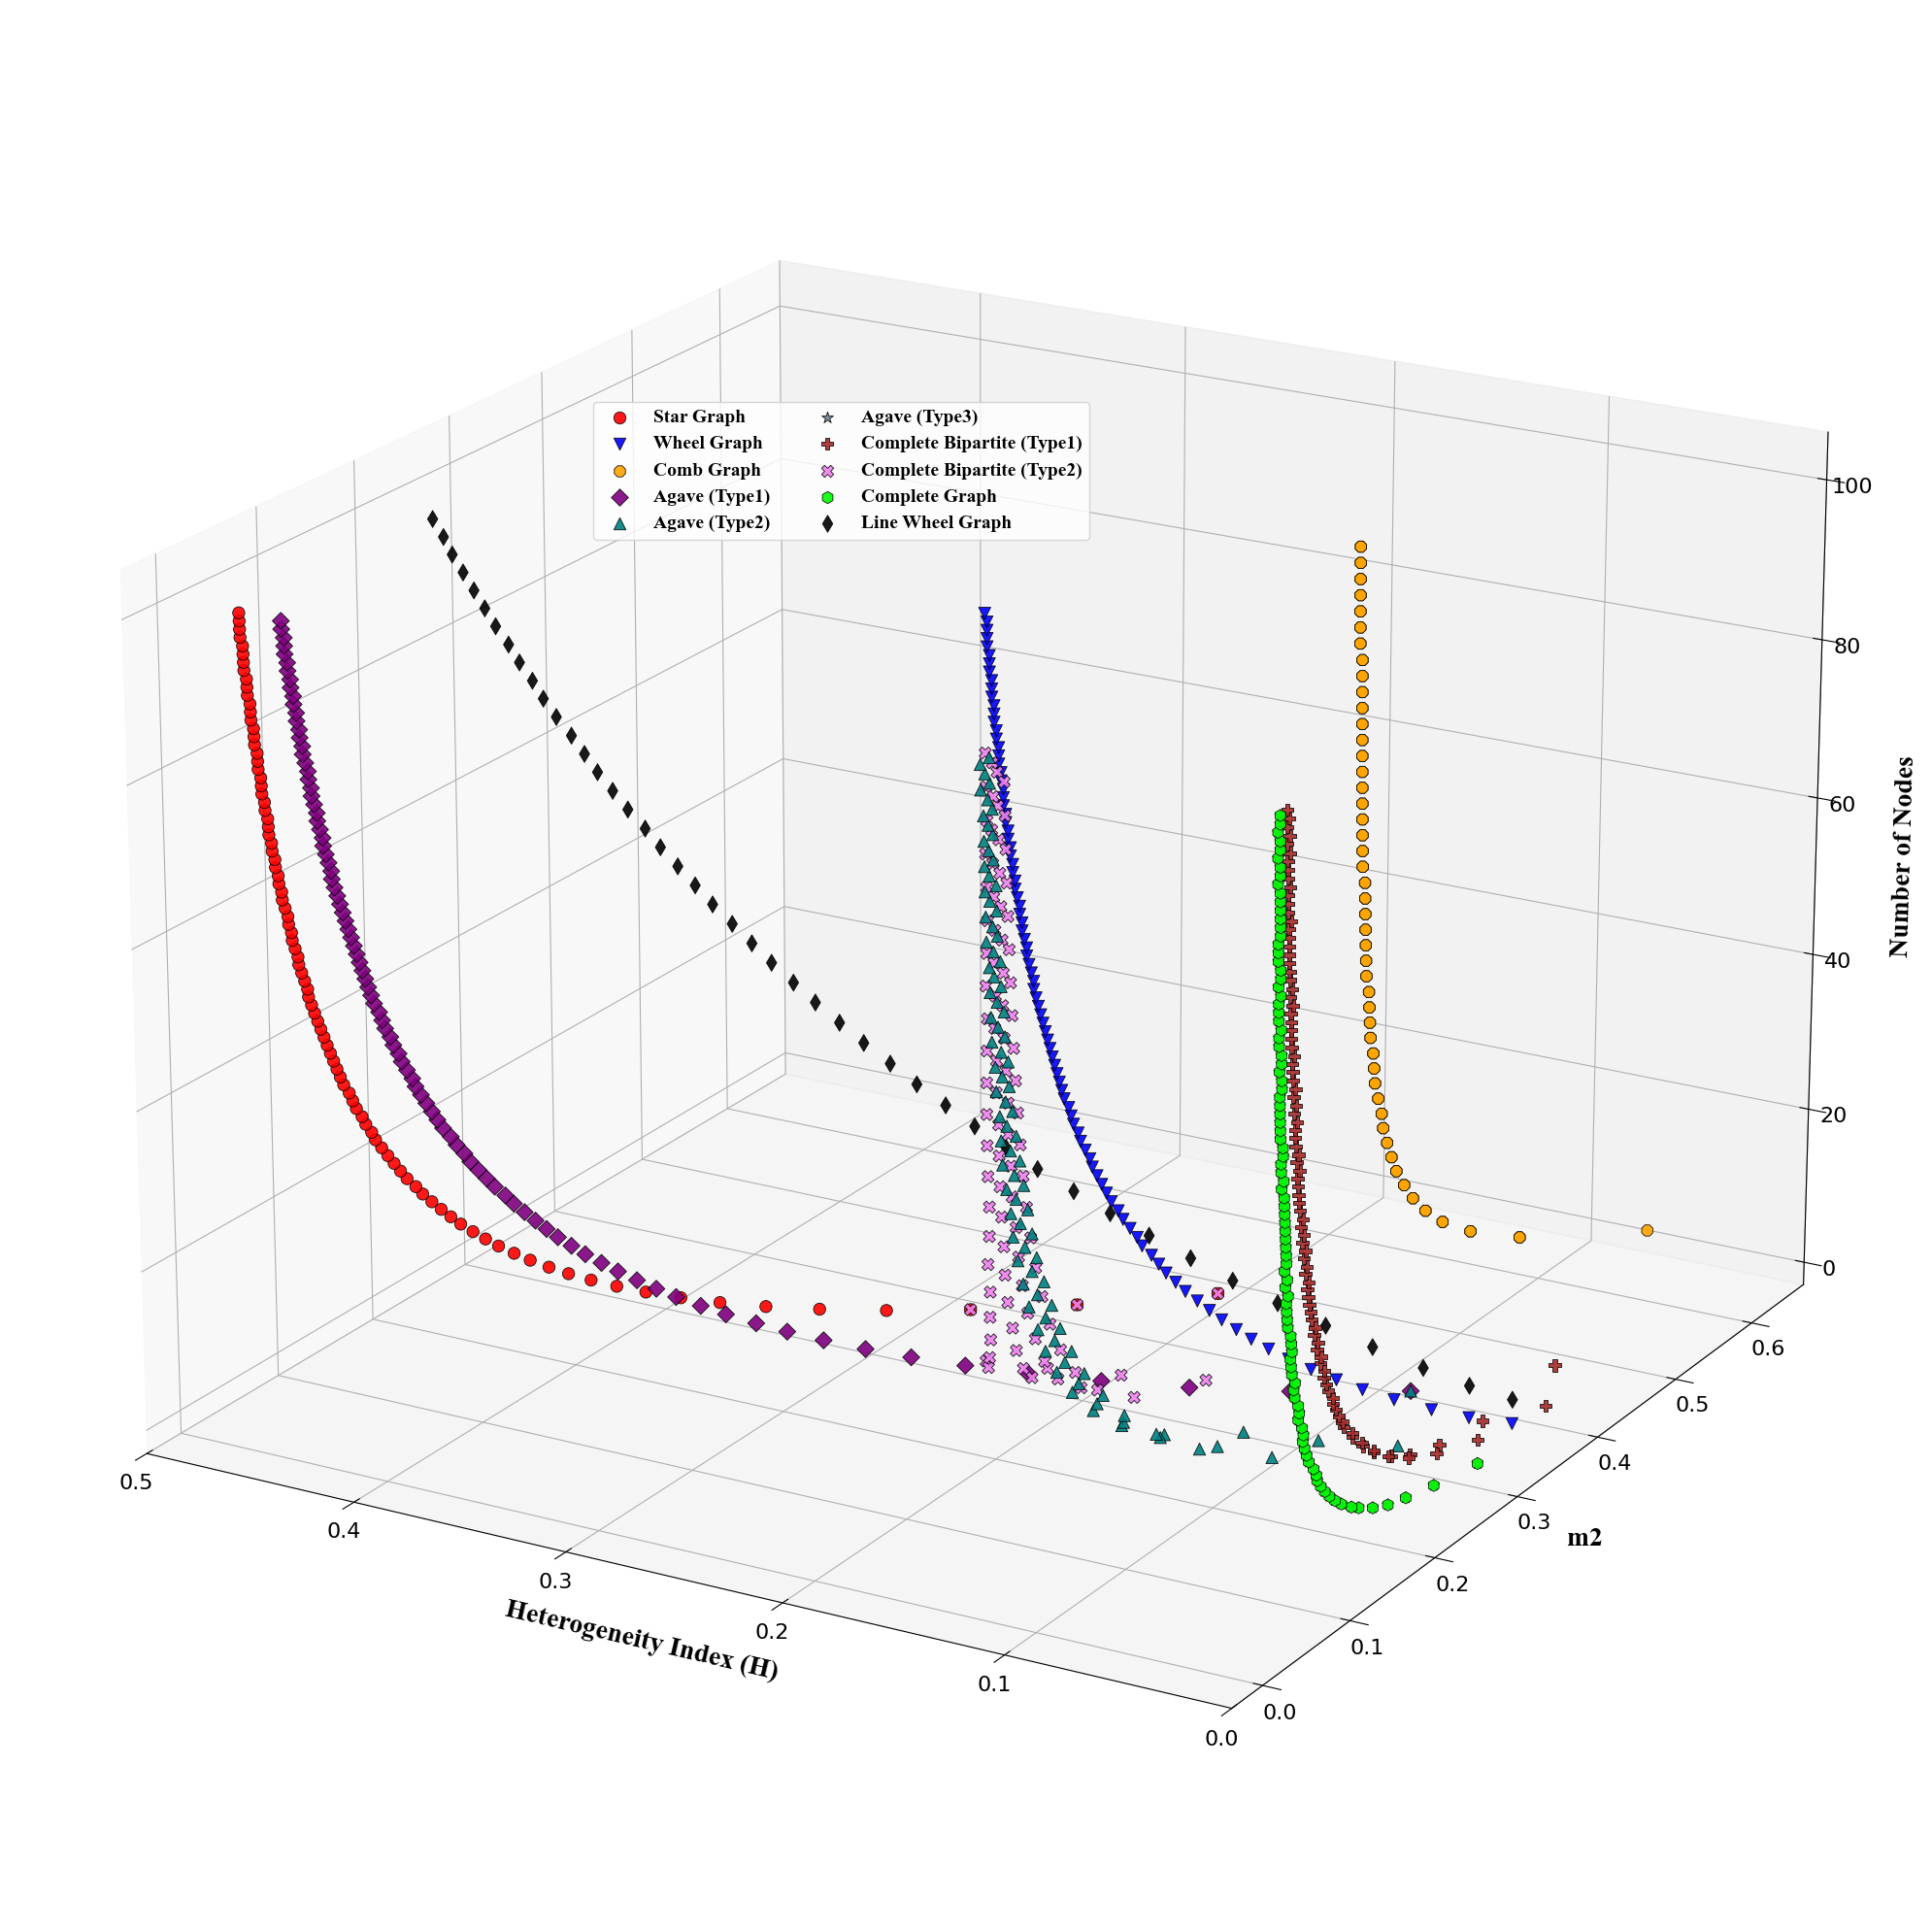

In [18]:
graph_keys = list(values_dict.keys())
exclude_keys = []

colors = ['red', 'blue', 'orange', 'purple', 'teal', 'slategrey', 'brown', 'violet', 'lime', 'black']
markers = ['o', 'v', '8', 'D', '^', '*', 'P', 'X', 'h', 'd']

legend_names = {
    'comb': 'Comb Graph',
    'star': 'Star Graph',
    'wheel': 'Wheel Graph',
    'complete_bipartite a=b': 'Complete Bipartite (Type1)',
    'complete_bipartite a=b/3': 'Complete Bipartite (Type2)',
    'complete': 'Complete Graph',
    'line_wheel': 'Line Wheel Graph',
    'agave step=1': 'Agave (Type1)',
    'agave step=n/3': 'Agave (Type2)',
    'agave step=n': 'Agave (Type3)'
}

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

font = {'family': 'times new roman', 'weight': 'bold', 'size': 14}

for i, key in enumerate(graph_keys):
    if key in exclude_keys:
        continue

    if key == 'line_wheel':
        H_vals = np.array(values_dict[key]['H'])
        m2_vals = np.array(values_dict[key]['m2'])
        n_vals = np.array(values_dict[key]['n'])
        mask = n_vals < 100
        H_vals, m2_vals, n_vals = H_vals[mask], m2_vals[mask], n_vals[mask]
    else:
        H_vals = np.array(values_dict[key]['H'])
        m2_vals = np.array(values_dict[key]['m2'])
        n_vals = np.array(values_dict[key]['n'])

    if len(H_vals) == 0:
        continue

    label = legend_names.get(key, key.replace('_', ' ').title() + " Graph")
    color = colors[i % len(colors)]
    marker = markers[i % len(markers)]

    ax.scatter(
        H_vals,                 # x: H
        m2_vals,                # y: m2
        n_vals,                 # z: number of nodes
        c=color,               
        marker=marker,
        s=80,                   
        edgecolors='black',
        linewidth=0.6,
        alpha=0.9,
        label=label
    )

ax.set_xlabel('Heterogeneity Index (H)', family='times new roman', weight='bold', size=20, labelpad=15)
ax.set_ylabel('m2', family='times new roman', weight='bold', size=20, labelpad=15)
ax.set_zlabel('Number of Nodes', family='times new roman', weight='bold', size=20, labelpad=20)

ax.set_xlim(0.5, 0)

for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.set_tick_params(labelsize=16)


ax.legend(
    prop=font,
    ncol=2,
    bbox_to_anchor=(0.3, 0.8),
    loc='upper left',
    title_fontsize=25,
    fontsize=20,
)

ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.6)
ax.view_init(elev=20, azim=-60)

plt.tight_layout()
plt.savefig("Figures/artificial_networks_3D.png", dpi=1000)
plt.show()